# Imports

In [1]:
from util import *
import seaborn as sns
import matplotlib.pyplot as plt

# Observation

In this notebook we will create the suitable datasets for our final XGB model. These datasets are going to contain two players' informations alongside a binary variable indicating whether the first one is more expensive than the second one.</br>
In the previous notebook we observed that league_name, club_position, body_type, and real_face are non-consumption columns and preferred_foot, and work_rate are consumption columns. In this notebook we will fit a PCA on conumption columns and an MCA on non-consumtion columns.</br>
We will explore different methods to see which one is better for combining these two values.

In [2]:
data = pd.read_csv('Dataset/analyzed_data.csv')
data.head()

,sofifa_id,name,overall,potential,value_eur,wage_eur,club_team_id,league_name,league_level,club_position,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,158023,8854,93,93,78000000.0,320000.0,73.0,19,1.0,25,...,64,64,64,66,61,50,50,50,61,19
1,188545,12623,92,92,119500000.0,270000.0,21.0,21,1.0,27,...,66,66,66,64,61,60,60,60,61,19
2,20801,2876,91,91,45000000.0,270000.0,11.0,17,1.0,27,...,59,59,59,63,60,53,53,53,60,20
3,190871,11447,91,91,129000000.0,270000.0,73.0,19,1.0,14,...,63,63,63,67,62,50,50,50,62,20
4,192985,7886,91,91,125500000.0,350000.0,10.0,17,1.0,19,...,80,80,80,79,75,69,69,69,75,21


In [3]:
data.columns

Index(['sofifa_id', 'name', 'overall', 'potential', 'value_eur', 'wage_eur',
       'club_team_id', 'league_name', 'league_level', 'club_position',
       'club_jersey_number', 'club_contract_valid_until', 'nationality_id',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_po

# PCA

Firstly, we will convert the consumption columns into numeric features.

In [4]:
consumption_columns = ['work_rate', 'preferred_foot']
le = LabelEncoder()
for col in consumption_columns:
    data[col] = le.fit_transform(data[col])

In [5]:
data[consumption_columns].head()

,work_rate,preferred_foot
0,7,0
1,2,1
2,1,1
3,2,1
4,0,1


Now we will fit PCA accordingly.

In [6]:
object_columns = data.select_dtypes(include=['object']).columns.to_list()
print(object_columns)
numeric_columns = data.select_dtypes(include=[float, int]).columns.tolist()
numeric_columns.remove('sofifa_id')

[]


In [7]:
data.drop(columns=['name', 'sofifa_id'], inplace=True)

In [8]:
data = pd.get_dummies(data, columns=object_columns)
pca = PCA(n_components=1)
pca_result = pca.fit_transform(data.drop(columns=['value_eur']))
data['PCA'] = pca_result[:, 0]

data.head()

,overall,potential,value_eur,wage_eur,club_team_id,league_name,league_level,club_position,club_jersey_number,club_contract_valid_until,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,PCA
0,93,93,78000000.0,320000.0,73.0,19,1.0,25,30.0,2023.0,...,64,64,66,61,50,50,50,61,19,1.386237e+08
1,92,92,119500000.0,270000.0,21.0,21,1.0,27,9.0,2023.0,...,66,66,64,61,60,60,60,61,19,1.915236e+08
2,91,91,45000000.0,270000.0,11.0,17,1.0,27,7.0,2023.0,...,59,59,63,60,53,53,53,60,20,7.762365e+07
3,91,91,129000000.0,270000.0,73.0,19,1.0,14,10.0,2025.0,...,63,63,67,62,50,50,50,62,20,2.330235e+08
4,91,91,125500000.0,350000.0,10.0,17,1.0,19,17.0,2025.0,...,80,80,79,75,69,69,69,75,21,2.265236e+08


Now let's chack if this metric is good for our evaluation.

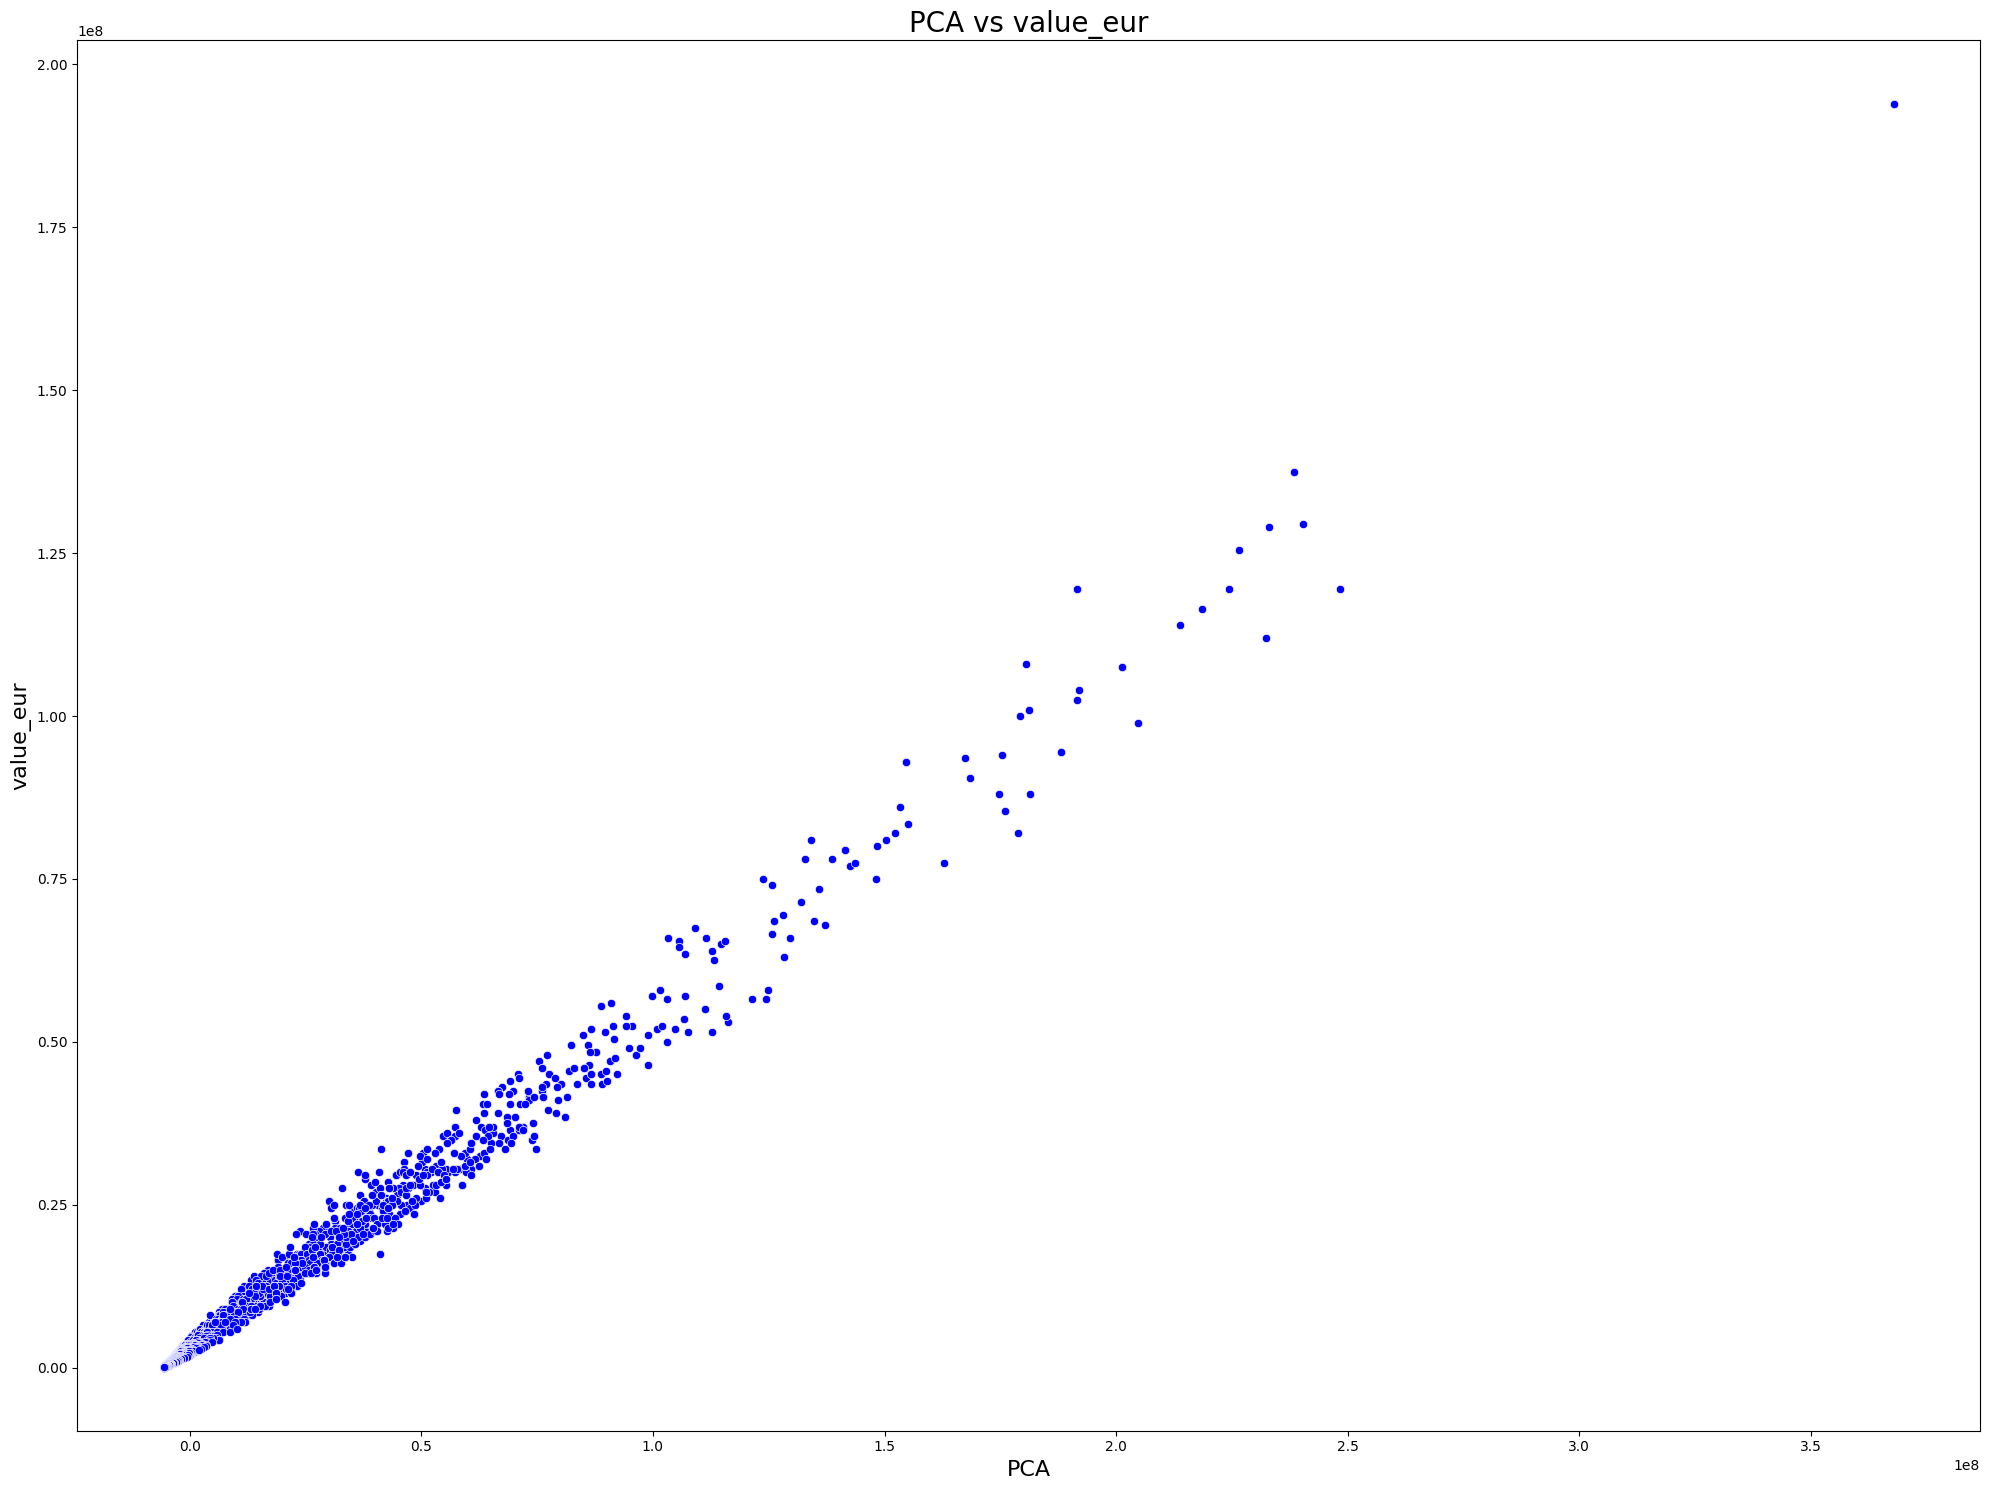

In [9]:
fig, axe = plt.subplots(figsize=(20, 15))

sns.scatterplot(x='PCA', y='value_eur', data=data, ax=axe, color='b')
axe.set_title('PCA vs value_eur', fontsize=20)
axe.set_xlabel('PCA', fontsize=16)
axe.set_ylabel('value_eur', fontsize=16)

plt.tight_layout()
plt.show()

As we can see, there is a significant linear correlation between the PCA column and our target column. Now we will save the dataframe and use it for training the model.

In [10]:
data.to_csv('./Dataset/final_data.csv', index=False)